# 120 years of olympic history
120 year olympic history dataset from Kaggle
https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

### Questions
Questions answered by Annelies for assignment 3
1. In which year did the Netherlands win the most total medals and the most golden medals
2. Who is the most successfull olympic Dutch female athlete and male athlete (successfull = most total medals)
3. Did the Netherlands win more during the summer or winter olympics?

*31-05-2020 AB: This is the notebook as I made it for assigmnent 3<br>
Here I chose to rename the NOC columns to Country and just use the abbreviations<br>
For the capstone project we need to replace this by merging the second csv <br>
And ofcourse decide on other questions to answer as well :)<br>
Also, I just tried to fill in the missings with median/means, we have to decide what we want to do together*

In [1]:
import pandas as pd

In [2]:
#Open dataset
path = 'data\\athlete_events.csv'

df = pd.read_csv(path)
df.head()

#Rename NOC column to Country
df = df.rename(columns={'NOC': 'Country'})

df.head(2)


,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [3]:
print(df.shape)
df.describe()

(271116, 15)


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [4]:
# Remove people from dataset that did not win a medal at all
df = df[df.Medal.isnull() == False]

print(df.describe())

# Check which variables have missings
print(df.isnull().sum())

# Fill age with the mean age
df.Age.fillna(df.Age.mean())

# Fill missing length and weight with the median
df.Weight.fillna(df.Weight.median())
df.Height.fillna(df.Height.median())



                  ID           Age        Height        Weight          Year
count   39783.000000  39051.000000  31072.000000  30456.000000  39783.000000
mean    69407.051806     25.925175    177.554197     73.770680   1973.943845
std     38849.980737      5.914026     10.893723     15.016025     33.822857
min         4.000000     10.000000    136.000000     28.000000   1896.000000
25%     36494.000000     22.000000    170.000000     63.000000   1952.000000
50%     68990.000000     25.000000    178.000000     73.000000   1984.000000
75%    103461.500000     29.000000    185.000000     83.000000   2002.000000
max    135563.000000     73.000000    223.000000    182.000000   2016.000000
ID            0
Name          0
Sex           0
Age         732
Height     8711
Weight     9327
Team          0
Country       0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


3         178.0
37        178.0
38        178.0
40        184.0
41        175.0
          ...  
271078    168.0
271080    168.0
271082    182.0
271102    171.0
271103    171.0
Name: Height, Length: 39783, dtype: float64

In [5]:
# Open dataset noc_regions.csv
country_names = pd.read_csv('data\\noc_regions.csv')
country_names.head(5)


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
# Add country names from noc_regions.csv
df = pd.merge(df,country_names, left_on = 'Country', right_on = 'NOC', how = 'left')
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal,NOC,region,notes
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,DEN,Denmark,NaN
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,FIN,Finland,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,FIN,Finland,NaN


In [7]:
# Check which variables have missings
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age          732
Height      8711
Weight      9327
Team           0
Country        0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
NOC            1
region         1
notes      39239
dtype: int64


In [9]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal,NOC,region,notes
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,DEN,Denmark,NaN
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,FIN,Finland,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,FIN,Finland,NaN


Questions to answer:
1. In which year did the Netherlands win the most total medals and the most golden medals at one olympic event?

In [10]:
# Select only Dutch athletes
df_ned = df[df.Country == 'NED']

df_medals = df_ned.groupby(['Year','Season'])['ID'].count()
max_medals = df_medals.max()
year = df_medals[df_medals == max_medals].index[0][0]
print(f'Most medals (n={max_medals}) in the year {year}')

df_goldmedals = df_ned[df.Medal == 'Gold'].groupby(['Year','Season','Medal'])['ID'].count()
max_goldmedals = df_goldmedals.max()
year = df_goldmedals[df_goldmedals == max_goldmedals].index[0][0]
print(f'Most gold medals (n={max_goldmedals}) in the year {year}')

Most medals (n=79) in the year 2000
Most gold medals (n=39) in the year 2008


C:\Users\lvlasb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


2. Who is the most successfull olympic Dutch female athlete and male athlete (successfull = most total medals or most golden medals)

In [11]:
df_medals = df_ned.Name.value_counts()
max_medals = df_medals.max()
max_medals

9

In [12]:
df_medals[1]
#df_medals[1]
#df_medals_top = df_medals.loc[(df_medals[0] == 'max_medals')]

8

In [13]:
df_medals = df_ned.Name.value_counts()
max_medals = df_medals.max()
athlete = ','.join(df_medals[df_medals == max_medals].index)
print(f'The most succesfull Dutch olympic athlete(s) up to 2016 is {athlete} with {max_medals} total medals.')

df_goldmedals = df_ned[df_ned.Medal == 'Gold'].Name.value_counts()
max_goldmedals = df_goldmedals.max()
athlete = ', '.join(df_goldmedals[df_goldmedals == max_goldmedals].index)
print(f'The most succesfull Dutch olympic athlete(s) up to 2016 is {athlete} with {max_goldmedals} gold medals.')

df_medals_male = df_ned[df_ned.Sex == 'M']
df_medals_female = df_ned[df_ned.Sex == 'F']

for df_ned_sex in [df_medals_male, df_medals_female]:
    df_medals = df_ned_sex.Name.value_counts()
    df_goldmedals = df_ned_sex[df_ned_sex.Medal == 'Gold'].Name.value_counts()
    max_medals = df_medals.max()
    max_goldmedals = df_goldmedals.max()
    athlete = ', '.join(df_medals[df_medals == max_medals].index)
    athlete_gold = ', '.join(df_goldmedals[df_goldmedals == max_goldmedals].index)

    if df_ned_sex['Sex'].max() == 'M':
        sex = 'male'
    else:
        sex = 'female'
    print(f'The most succesfull {sex} Dutch olympic athlete(s) up to 2016 is {athlete} with {max_medals} total medals.')
    print(f'The most succesfull {sex} Dutch olympic athlete(s) up to 2016 is {athlete_gold} with {max_goldmedals} gold medals.')


The most succesfull Dutch olympic athlete(s) up to 2016 is Theodora Elisabeth Gerarda "Anky" van Grunsven with 9 total medals.
The most succesfull Dutch olympic athlete(s) up to 2016 is Irene Karlijn "Ireen" Wst, Charles Ferdinand Pahud de Mortanges, Francina Elsje "Fanny" Blankers-Koen, Leontine Martha Henrica Petronella "Leontien" Zijlaard-van Moorsel, Inge de Bruijn with 4 gold medals.
The most succesfull male Dutch olympic athlete(s) up to 2016 is Sven Kramer, Pieter Cornelis Martijn van den Hoogenband with 7 total medals.
The most succesfull male Dutch olympic athlete(s) up to 2016 is Charles Ferdinand Pahud de Mortanges with 4 gold medals.
The most succesfull female Dutch olympic athlete(s) up to 2016 is Theodora Elisabeth Gerarda "Anky" van Grunsven with 9 total medals.
The most succesfull female Dutch olympic athlete(s) up to 2016 is Inge de Bruijn, Francina Elsje "Fanny" Blankers-Koen, Leontine Martha Henrica Petronella "Leontien" Zijlaard-van Moorsel, Irene Karlijn "Ireen" Ws

3. Did the Netherlands win more during the summer or winter olympics?

In [14]:
df_medals = df_ned.groupby(['Season'])['ID'].count()
df_medals

print(f'The most medals of Dutch olympic athletes were won during the {df_medals[df_medals == df_medals.max()].index[0]} olympic games (namely: {df_medals.max()} medals in total)')

#Corrected for number of olympic games that were performed
summer_indf = len(df.groupby(['Season'])['Year'].unique()['Summer'])
winter_indf = len(df.groupby(['Season'])['Year'].unique()['Winter'])

summer_medals = df_medals['Summer']
winter_medals = df_medals['Winter']

medals_pergame = {'summer': summer_medals/summer_indf, 
                  'winter': winter_medals/winter_indf}
keymax = max(medals_pergame, key=medals_pergame.get) 
print(f'The most medals of Dutch olympic athletes corrected for number of games were won during the {keymax} olympic games (namely: {int(round(medals_pergame[keymax]))} on average per olympic game)')



The most medals of Dutch olympic athletes were won during the Summer olympic games (namely: 918 medals in total)
The most medals of Dutch olympic athletes corrected for number of games were won during the summer olympic games (namely: 32 on average per olympic game)


4. At what rank did the Netherlands end each year & season (based on total medals compared to total medals of the other countries)?

In [15]:
df_medals_tot = df.groupby( ['Year','Season','region'] ).size().to_frame(name = 'count').reset_index()
df_medals_tot

,Year,Season,region,count
0,1896,Summer,Australia,3
1,1896,Summer,Austria,5
2,1896,Summer,Denmark,6
3,1896,Summer,France,11
4,1896,Summer,Germany,32
...,...,...,...,...
1638,2016,Summer,Ukraine,15
1639,2016,Summer,United Arab Emirates,1
1640,2016,Summer,Uzbekistan,13
1641,2016,Summer,Venezuela,3


In [16]:
# View list of countries
df_medals_tot['region'].unique() 

array(['Australia', 'Austria', 'Denmark', 'France', 'Germany', 'Greece',
       'Hungary', 'Switzerland', 'UK', 'USA', 'Belgium', 'Canada',
       'Colombia', 'Cuba', 'Czech Republic', 'Haiti', 'India', 'Italy',
       'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Spain', 'Sweden', 'Finland', 'Russia', 'South Africa', 'Brazil',
       'Estonia', 'Japan', 'Argentina', 'Ireland', 'Monaco', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Uruguay', 'Nepal', 'Chile',
       'Egypt', 'Philippines', 'Latvia', 'Turkey', 'Iran', 'Jamaica',
       'Panama', 'Peru', 'Puerto Rico', 'South Korea', 'Sri Lanka',
       'Trinidad', 'Bulgaria', 'Lebanon', 'Venezuela', 'Bahamas',
       'Iceland', 'Pakistan', 'Ethiopia', 'Ghana', 'Iraq', 'Morocco',
       'Singapore', 'Syria', 'Taiwan', 'Kenya', 'Nigeria', 'Tunisia',
       'North Korea', 'Cameroon', 'Mongolia', 'Uganda', 'Niger',
       'Bermuda', 'Thailand', 'Liechtenstein', 'Guyana', 'Tanzania',
       'Zimbabwe', 'Algeri

In [44]:
df_medals_tot2 = df_medals_tot.loc[df_medals_tot['Year']>= 2000]
df_medals_tot2['rank'] = df_medals_tot2.groupby(['Year','Season'])['count'].rank('dense', ascending=False)
rank_NL = df_medals_tot2.loc[df_medals_tot2['region'] == 'Netherlands']
rank_NL_sorted = rank_NL.sort_values(by=['Year'])
rank_NL_sorted

,Year,Season,region,count,rank
1182,2000,Summer,Netherlands,79,5.0
1226,2002,Winter,Netherlands,8,13.0
1279,2004,Summer,Netherlands,77,8.0
1324,2006,Winter,Netherlands,13,13.0
1387,2008,Summer,Netherlands,61,10.0
1436,2010,Winter,Netherlands,11,12.0
1499,2012,Summer,Netherlands,69,8.0
1545,2014,Winter,Netherlands,29,8.0
1608,2016,Summer,Netherlands,47,13.0


In [45]:
import matplotlib.pyplot as plt
import numpy as np

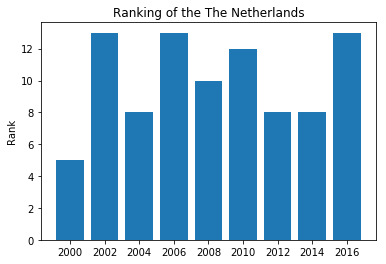

In [46]:
objects = rank_NL_sorted['Year']
y_pos = np.arange(len(objects))
rank = rank_NL_sorted['rank']

plt.bar(y_pos, rank, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Rank')
plt.title('Ranking of the The Netherlands')

plt.show()

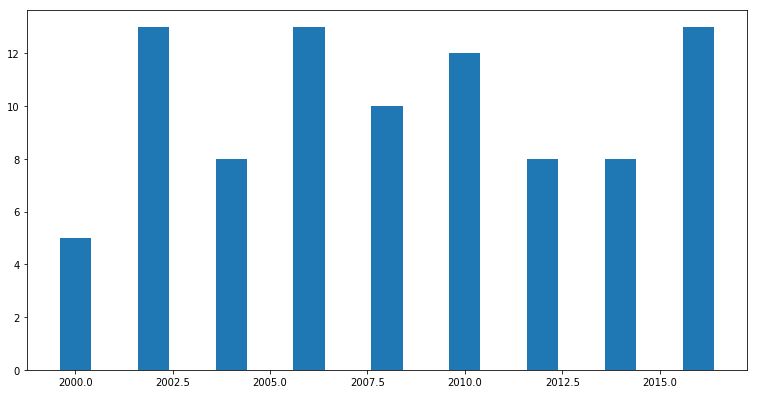

In [47]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
year = rank_NL_sorted['Year']
rank = rank_NL_sorted['rank']
ax.bar(year,rank,align='center', alpha=1.0)
plt.show()